# 4.4 Convergence of $\frac{1}{N_{M}} \left \Vert \mathbf{u}(\boldsymbol{\mu}) - \mathbf{u}_{DNN}(\boldsymbol{\mu}; \tilde{\boldsymbol{\Theta}})\right \Vert ^2$
## trains the models. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
import torch
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

K=2
N_x = 20000 #number of samples
N_mus = [5, 10, 15, 20, 25] #number of parameters
 
N_n = 10 #number of neurons
N_HL = 2
lr = 5*1e-4

# we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss()



In [2]:
N_hs = np.array([19, 29, 39, 49, 59])
num_epochs=50
batch_size=16
PATH_SAVE = "./table_convergence/NN"


In [3]:
print("K = ", K)
for N_mu in N_mus:
    for k, N_h in enumerate(N_hs):
        print("starts with N_h = ", N_h)
        dataset=Inputs(N_x, N_mu, N_h, K=K)
        model = Net(N_HL, N_n, N_h, N_mu)
        dataloader = DataLoader(dataset = dataset, batch_size=batch_size, shuffle=True, num_workers=0)
        optimizer = optim.Adam(model.parameters(), lr=lr)

        #training: 
        print("training...")
        for t in range(num_epochs):
            for i, (inputs, outputs) in enumerate(dataloader):
                y_pred = model(inputs)
                loss = loss_fn(y_pred, outputs) #compute the loss

                optimizer.zero_grad()   # zero the gradient buffers
                loss.backward()
                    
                optimizer.step()    # Does the update
        PATH = PATH_SAVE + "/K = " + str(K) + "_model_N_h= " + str(N_h) + "_N_mu=" + str(N_mu) + '.pth'
        torch.save(model.state_dict(), PATH)



K =  2
starts with N_h =  19
x shape :  (20000, 10)
y shape :  (20000, 19)
training...
starts with N_h =  29
x shape :  (20000, 10)
y shape :  (20000, 29)
training...
starts with N_h =  39
x shape :  (20000, 10)
y shape :  (20000, 39)
training...
starts with N_h =  49
x shape :  (20000, 10)
y shape :  (20000, 49)
training...
starts with N_h =  59
x shape :  (20000, 10)
y shape :  (20000, 59)
training...
starts with N_h =  19
x shape :  (20000, 15)
y shape :  (20000, 19)
training...
starts with N_h =  29
x shape :  (20000, 15)
y shape :  (20000, 29)
training...
starts with N_h =  39
x shape :  (20000, 15)
y shape :  (20000, 39)
training...
starts with N_h =  49
x shape :  (20000, 15)
y shape :  (20000, 49)
training...
starts with N_h =  59
x shape :  (20000, 15)
y shape :  (20000, 59)
training...
starts with N_h =  19
x shape :  (20000, 20)
y shape :  (20000, 19)
training...
starts with N_h =  29
x shape :  (20000, 20)
y shape :  (20000, 29)
training...
starts with N_h =  39
x shape :  

# Plot solution

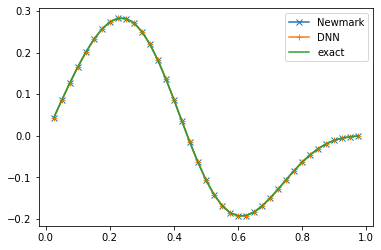

In [9]:
N_mu = 5
N_h = 39
model = Net(N_HL, N_n, N_h, N_mu)
PATH = PATH_SAVE + "/K = " + str(K) + "_model_N_h= " + str(N_h) + "_N_mu=" + str(N_mu) + '.pth'
model.load_state_dict(torch.load(PATH))

Mus = np.random.uniform(low = -1, high = 1, size = (int(N_mu)))
somme = fct(Mus, K)

h = 1/(N_h + 1)
H = np.arange(1, N_h+1)*h

#DNN sol:
x = torch.from_numpy(Mus).float()
y_DNN = model(x)
#Newmark sol:
y_new, t = newmark(int(N_h), int(N_h), somme, h, h)
#Exact sol: 
uex = sol_given_fct2(somme)
y_ex = (np.vectorize(uex))(H,t)

#plot
plt.plot(H, y_new, '-x')
plt.plot(H, y_DNN.detach().numpy(), '-+')
plt.plot(H, y_ex)
plt.legend(["Newmark", "DNN", "exact"])
